# IS602 -- Assignment 11 -- James Hamski

Perform a Monte Carlo simulation to calculate Value at Risk (VaR) for the Apple stock price using the file attached to this lesson. There exist a number of ways to do this type of analysis, but you can follow this basic procedure (refer to this PDF (mc.pdf  ) for a more rigorous mathematical overview):

1. The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding row.
2. Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.
3. With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.
4. Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this, take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price.
5. Store the final price after 20 days (you can discard the intermediate price values).
6. Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.
7. Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result, and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a confidence level of 99%.

The other requirement for this assignment is to use an IPython Notebook.  Include in the notebook all the code, the results, and any other information you feel is needed (charts, graphs, plots, etc).  Rather than submitting .py files, give me the .ipynb file for your notebook.

*Python Modules*

In [55]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


*Data Import and Formatting* 

In [31]:
apple = pd.read_csv('apple.2011.csv', header=0, na_values='XXXXX', parse_dates=True)
apple.columns = ['Date', 'Last', 'PercentChange']

In [33]:
apple.head()

,Date,Last,PercentChange
0,1/3/2011,329.57,NaN
1,1/4/2011,331.29,0.005219
2,1/5/2011,334.00,0.008180
3,1/6/2011,333.73,-0.000808
4,1/7/2011,336.12,0.007161


In [34]:
apple.dtypes

Date              object
Last             float64
PercentChange    float64
dtype: object

In [35]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [36]:
apple.dtypes

Date             datetime64[ns]
Last                    float64
PercentChange           float64
dtype: object

In [37]:
apple.head()

,Date,Last,PercentChange
0,2011-01-03,329.57,NaN
1,2011-01-04,331.29,0.005219
2,2011-01-05,334.00,0.008180
3,2011-01-06,333.73,-0.000808
4,2011-01-07,336.12,0.007161


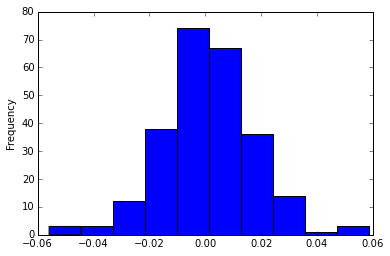

In [64]:
apple['PercentChange'].plot(kind='hist')

*Generate random numbers with the same probability distribution as the Percent Change column*

In [89]:
apple_mean_df = apple.mean()
apple_std_df = apple.std()

In [90]:
apple_mean = apple_mean_df['PercentChange']
print apple_mean

0.000957355207171


In [91]:
apple_std = apple_std_df['PercentChange']
print apple_std

0.0165205562984


In [78]:
test_PercentChange = np.random.normal(loc=apple_mean['PercentChange'], scale=apple_std['PercentChange'], size=20)
print test_PercentChange

[ 0.00614259 -0.00274768  0.01884464  0.00734913 -0.00093752  0.01558639
 -0.01738093  0.02561503  0.00055935 -0.02034752 -0.01066826 -0.01637337
 -0.00805622  0.01892063 -0.01833456 -0.00565846  0.00195209  0.00338809
  0.00385675 -0.00434933]


In [79]:
def GeneratePercentChange(mean, std):
    return np.random.normal(loc=mean, scale=std, size=20)

In [80]:
def PriceQuote(start, PercentChange):
    price = start
    for i in PercentChange:
        price = price+(price*i)
    return price

Confirm these functions result in a reasonable price after 20 days

In [151]:
test_PercentChange_2 = GeneratePercentChange(apple_mean, apple_std)
apple_start_price = int(apple['Last'].tail(1))

print PriceQuote(apple_start_price, test_PercentChange_2)

395.934276474


In [152]:
iterations = 10000

In [154]:
prices = []
for i in range(0, iterations):
    random_walk = GeneratePercentChange(apple_mean, apple_std)
    
    
    end_price = PriceQuote(apple_start_price, random_walk)
    
    prices.append(end_price)

(array([   10.,   109.,   685.,  2052.,  3174.,  2392.,  1173.,   333.,
           60.,    12.]),
 array([ 298.29527376,  322.68809424,  347.08091472,  371.4737352 ,
         395.86655567,  420.25937615,  444.65219663,  469.0450171 ,
         493.43783758,  517.83065806,  542.22347854]),
 <a list of 10 Patch objects>)

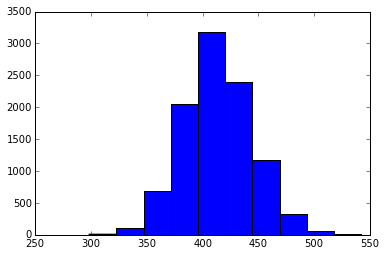

In [155]:
prices_array = np.array(prices)
prices_array.sort
plt.hist(prices_array)

Value at Risk with 99% confidence:

In [157]:
VaR_99 = np.percentile(prices_array, 1)
print VaR_99

344.308767971


In [160]:
def MonteCarloSimulation():
    prices = []
    for i in range(0, iterations):
        random_walk = GeneratePercentChange(apple_mean, apple_std)
        end_price = PriceQuote(apple_start_price, random_walk)
        prices.append(end_price)
        
    prices_array = np.array(prices)
    
    VaR_99 = np.percentile(prices_array, 1)
    
    return VaR_99

In [169]:
iterations = 100000
print MonteCarloSimulation()

346.345810557


In [170]:
%timeit MonteCarloSimulation()

1 loops, best of 3: 1.25 s per loop
